In [3]:
pip install termcolor

Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from termcolor import colored

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")

print(colored('\nAll libraries imported succesfully.', 'blue'))


All libraries imported succesfully.


In [23]:
df = pd.read_csv('Cardiovascular_Disease_Dataset.csv')
df.head(10)

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
5,148462,24,1,1,173,0,0,0,161,0,4.7,3,2,1
6,168686,79,1,2,130,240,0,2,157,0,2.5,2,1,1
7,170498,52,1,0,127,345,0,0,192,1,4.9,1,0,0
8,188225,62,1,0,121,357,0,1,138,0,2.8,0,0,0
9,192523,61,0,0,190,181,0,1,150,0,2.9,2,0,1


In [25]:
nRow, nCol = df.shape
print("Shape of dataset {}".format(df.shape))
print(f"Rows: {nRow} \nColumns: {nCol}")

Shape of dataset (1000, 14)
Rows: 1000 
Columns: 14


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [29]:
df.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [31]:
df.isna().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [33]:
df.columns

Index(['patientid', 'age', 'gender', 'chestpain', 'restingBP',
       'serumcholestrol', 'fastingbloodsugar', 'restingrelectro',
       'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels',
       'target'],
      dtype='object')

In [35]:
age_range = f"Age Range: {df['age'].min()} - {df['age'].max()}"
print(age_range)

Age Range: 20 - 80


In [27]:
gender_count = df['gender'].value_counts() ## (0: Female; 1: Male)
print(gender_count)

gender
1    765
0    235
Name: count, dtype: int64


In [30]:
chest_pain_counts = df['chestpain'].value_counts()
print(chest_pain_counts)

chestpain
0    420
2    312
1    224
3     44
Name: count, dtype: int64


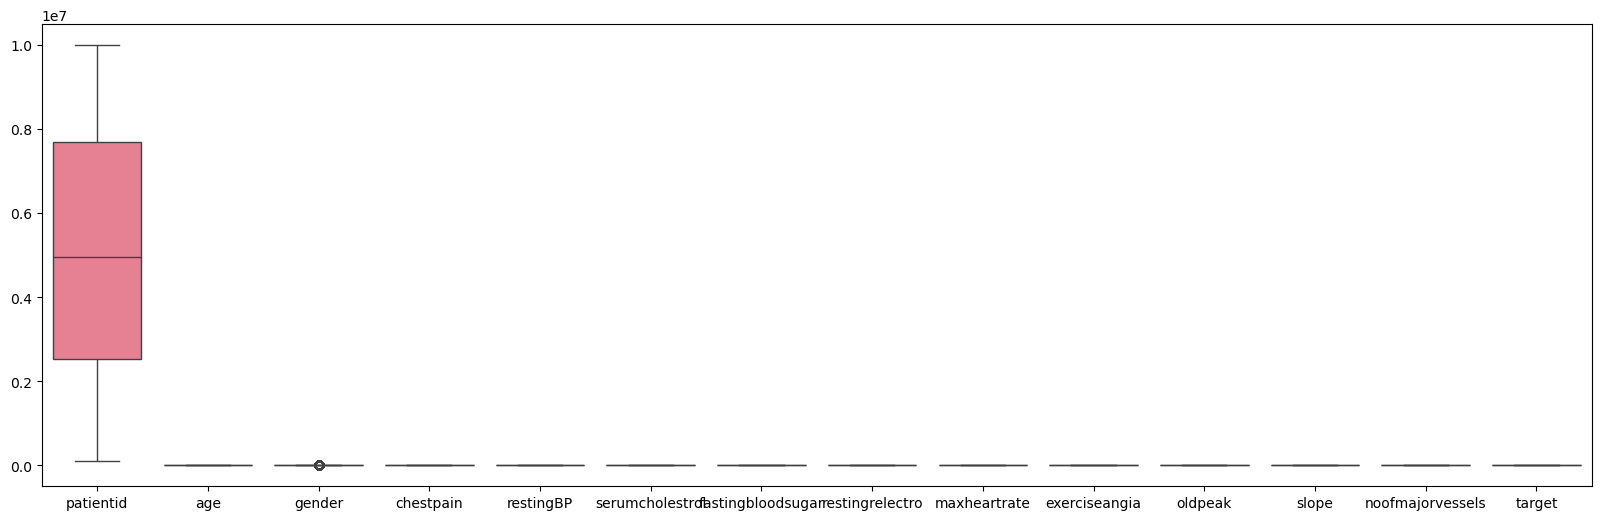

In [55]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=df)
plt.show()

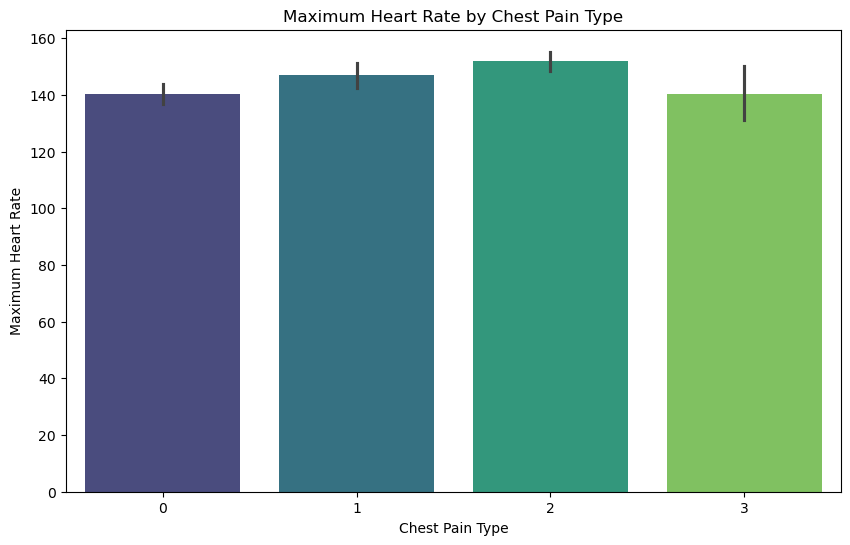

In [43]:
# Visualization:
plt.figure(figsize=(10, 6))
sns.barplot(x='chestpain', y='maxheartrate', data=df, palette='viridis')
plt.title('Maximum Heart Rate by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Maximum Heart Rate')
plt.show()

In [34]:
average_resting_bp = df['restingBP'].mean()
print(f"Average Resting Blood Pressure: {average_resting_bp:.2f} mm Hg")

Average Resting Blood Pressure: 151.75 mm Hg


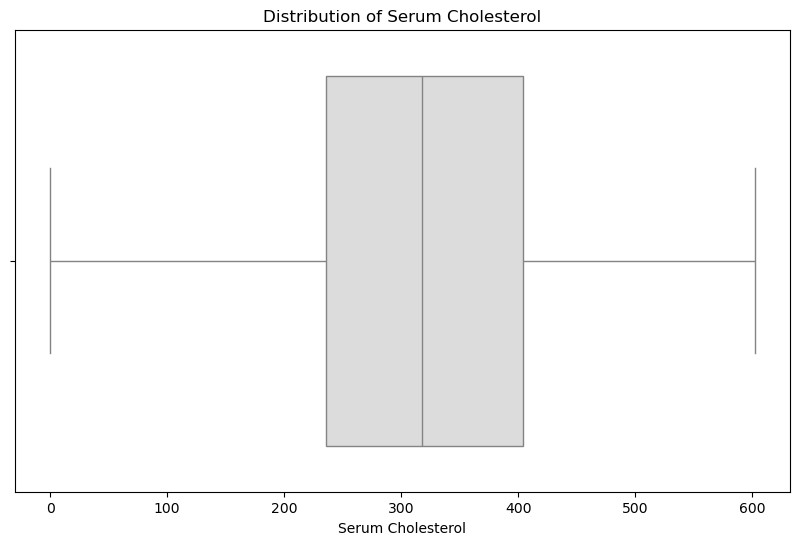

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='serumcholestrol', data=df, palette='coolwarm')
plt.title('Distribution of Serum Cholesterol')
plt.xlabel('Serum Cholesterol')
plt.show()

In [38]:
percentage_high_fasting_sugar = (df['fastingbloodsugar'].sum() / len(df)) * 100
print(f"Percentage of patients with fasting blood sugar > 120 mg/dl: {percentage_high_fasting_sugar:.2f}%")

Percentage of patients with fasting blood sugar > 120 mg/dl: 29.60%


In [40]:
resting_electro_counts = df['restingrelectro'].value_counts()
print(resting_electro_counts)

restingrelectro
0    454
1    344
2    202
Name: count, dtype: int64


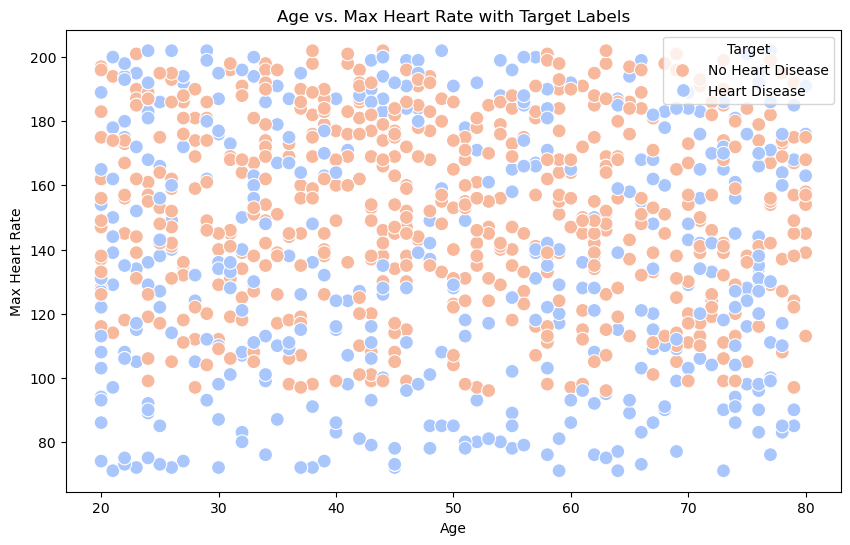

In [42]:
# Visualization:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='maxheartrate', hue='target', data=df, palette='coolwarm', s=100)
plt.title('Age vs. Max Heart Rate with Target Labels')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(title='Target', loc='upper right', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

In [44]:
average_max_heart_rate = df['maxheartrate'].mean()
print(f"Average Maximum Heart Rate: {average_max_heart_rate:.2f}")

Average Maximum Heart Rate: 145.48


In [46]:
exercise_angina_count = df['exerciseangia'].sum()
print(f"Number of Patients with Exercise-Induced Angina: {exercise_angina_count}")

Number of Patients with Exercise-Induced Angina: 498


In [48]:
average_oldpeak = df['oldpeak'].mean()
print(f"Average Oldpeak: {average_oldpeak:.2f}")

Average Oldpeak: 2.71


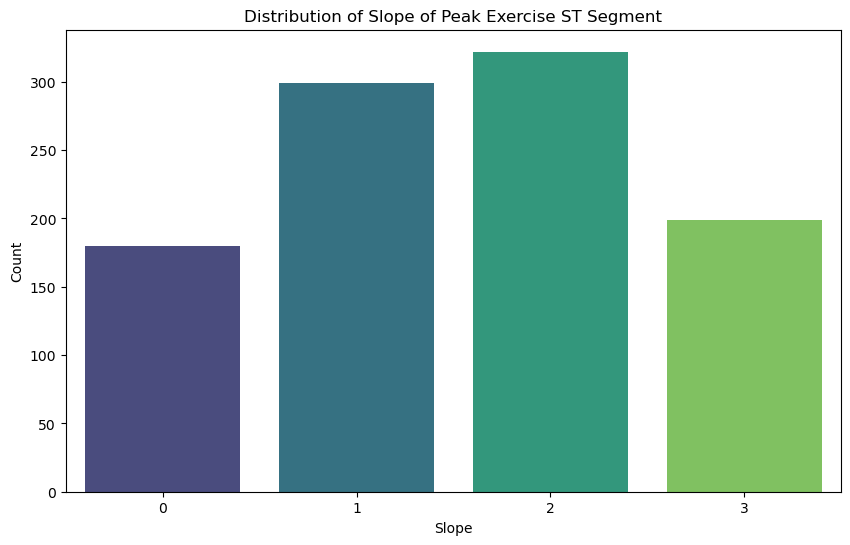

In [50]:
plt.figure(figsize=(10, 6))
sns.countplot(x='slope', data=df, palette='viridis')
plt.title('Distribution of Slope of Peak Exercise ST Segment')
plt.xlabel('Slope')
plt.ylabel('Count')
plt.show()